# **Estudo de Caso sobre Teoria de Filas**

Seja um sistema em que quatro aparelhos telefônicos e dois aparelhos de FAX disputam três canais de C kbps de uma rede RDSI-FE. Cada aparelho telefônico ocupa durante a comunicação um canal de C kbps, enquanto um aparelho de FAX ocupa dois canais de C kbps.

A taxa média de chamadas dos telefones é igual a $\lambda_{1}$ chamadas por hora com duração $T_{s_{1}}$ minutos, enquanto a dos aparelhos de FAX é de $\lambda_{2}$ chamadas por hora com duração $T_{s_{2}}$ minutos.

## **Considerações a respeito do Sistema de Filas**:
Uma rede RDSI-Fe é um Sistema de Filas do tipo MMNN, ou seja:
  - a taxa de chegadas de elementos no Sistema - $\lambda$, é Markoviana;
  - o tempo de atendimento dos elementos - $E[t_{s}]$, é Exponencialmente Distribuído;
  - são $N$ servidores disponíveis para atender os elementos do Sistema;
  - há capacidade para $N$ elementos no Sistema sem formação de Filas, ou seja, qualquer elemento que tenta acessar o Sistema é bloqueado se os servidores estiverem ocupados;
  - o modelo em questão é de população finita, com taxa $\lambda$ decrescente à medida que os elementos acessam o Sistema.

Para realizar a simulação em questão, foram adotados os valores $\lambda_{1}=5$ e $\lambda_{2}=10$ chamadas/hora e $T_{s_{1}}=5$ e $T_{s_{1}}=2$ minutos. Os canais são de $C=64$ kbps.

## **Modelo Teórico do Sistema de Filas:**
Dado um modelo multi-classe e considerando que cada classe ocupa $n$ servidores diferentes, o Diagrama de Estado para esse Sistema de Filas é bidimensional, em que as Chamadas Telefônicas representam o eixo horizontal e as de Fax, o eixo vertical.

O Sistema comporta no máximo $3$ Chamadas Telefônicas e $1$ de Fax na condição $N=3$, e a Figura a seguir ilustra o Diagrama de Estados, em que $P_{ij}$ representa $i$ Chamadas Telefônicas e $j$ de Fax. $$$$

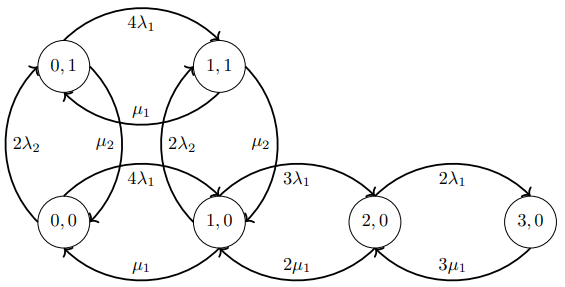 $$$$

Pela análise das Equações de Equilíbrio, o somátório dos estados $P_{ij}$ é igual a $1$, escritos em função de $P_{00}$.

$$P_{00}+P_{10}+P_{20}+P_{30}+P_{01}+P_{11}=1$$

$$P_{00}+P_{00}\cdot 4\rho_{1}+P_{00}\cdot 6\rho_{1}^{2}+P_{00}\cdot 4\rho_{1}^{3}+P_{00}\cdot 2\rho_{2}+P_{00}\cdot 2\rho_{2}\cdot 4\rho_{1}=1$$ $$$$


Seja o estado $P_{00}$ em evidência:

$$P_{00}\ [1+4\rho_{1}+6\rho_{1}^2+4\rho_{1}^3+2\rho_{2}(1+4\rho_{1})]=1$$ $$$$


Os fatores de utilização para cada uma das classes - $\rho_{1}\text{ e }\rho_{2}$, a partir das taxas de chegadas $\lambda_{1}\text{ e }\lambda_{2}$ em chamadas/minuto, são, respectivamente

$$\rho_{1}=\lambda_{1}\cdot T_{s_{1}}=\frac{5}{60}\cdot 5=\frac{25}{60}\text{ e }\rho_{2}=\lambda_{2}\cdot T_{s_{2}}=\frac{10}{60}\cdot 2=\frac{1}{3}\text{.}$$


Assim, $P_{00}=0,1731$ e os demais estados podem ser calculados como acima.




## **Modelo Simulado do Sistema de Filas:**
A simulação do Modelo de FIlas MMNN considera que para um sistema:
- **multi-classe:** é gerada uma variável aleatória uniforme para decidir qual classe está acessando o sistema no instante $t$;
- **sem Fila e servidor de capacidade $N$**: os elementos podem ser bloqueados com probabilidade $P_{b}$ associada à classe;
- **com popoulação finita:** a taxa de chegada da classe é decrescente à medida que os elementos acessam o sistema;
- o modelo para definir as partidas dos elementos é um array com os tempos para as próximas partidas. Quando o evento atual é uma partida, o instante $t$ é excluído do array.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Para análises seguintes, o modelo do Sistema de Fila é uma função que recebe o
# Número de Servidores e duas tuplas com os dados de cada Classe como parâmetros.
# A Tupla indica (população, taxaChegada, tempoServiço).

def MMNN_system(N: int = 3, Classe1: tuple = (4, 5, 5), Classe2: tuple = (2, 10, 2)):
  n_classe1, lambda_c1, Ets1 = Classe1          # Dados Classe 1.
  n_classe2, lambda_c2, Ets2 = Classe2          # Dados Classe 2.
  pInicial1, pInicial2 = [n_classe1, n_classe2] # População inicial de cada Classe.

  lambda1 = lambda_c1/60 * n_classe1    # Taxa de Chegadas para a Classe 1.
  lambda2 = lambda_c2/60 * n_classe2    # Taxa de Chegadas para a Classe 2.

  chegadas, partidas = [[0, 0], 0]      # Número de Chegadas (Classe) e de Partidas (Total).
  servidor, numBloqueios = [0, [0, 0]]  # Servidores Ocupados e Elementos Bloqueados por Classe.

  # Matriz com o número de ocorrências de cada Estado do Sistema.
  # Estados possíveis: (0,0), (1,0), (2,0), (3,0), (0,1) e (1,1), conforme
  # Diagrama de Estados anterior na condição N = 3.
  # Considerando cenários para as populações P1 e P2, a matriz é quadrada de
  # ordem max(P1, P2) + 1.
  matrizEstados = np.zeros((max(pInicial1, pInicial2) + 1, max(pInicial1, pInicial2) + 1))

  # O elemento que ocupa o Sistema inicialmente é resultado da geração de uma
  # variável aleatória uniforme com limiar dado pela proporção da população de
  # cada classe.
  if np.random.uniform(0, 1) < n_classe1/(n_classe1 + n_classe2): # Classe 1.
    servidor = 1            # Classe 1 ocupa 1 servidor.
    chegadas[0] = 1         # Contabiliza a Chegada de Elemento da classe 1.
    classesPartidas = [1]   # Aloca o Elemento na lista de ordem de partida.
    proximaChegada = np.random.exponential(1/lambda1, 1)
    proximasPartidas = proximaChegada + np.random.exponential(Ets1, 1)
    n_classe1 -= 1          # Decrementa a População da Classe 1.
  else:                                                           # Classe 2.
    servidor = 2            # Classe 2 ocupa 2 servidores.
    chegadas[1] = 1         # Contabiliza a Chegada de Elemento da Classe 2.
    classesPartidas = [2]   # Aloca o Elemento na lista de ordem de partida.
    proximaChegada = np.random.exponential(1/lambda2, 1)
    proximasPartidas = proximaChegada + np.random.exponential(Ets2, 1)
    n_classe2 -= 1          # Decrementa a População da Classe 2.

  # Contabiliza a Ocorrência do Estado Inicial na Matriz.
  limiarClasse = n_classe1/(n_classe1 + n_classe2) if (n_classe1 + n_classe2) != 0 else 1
  matrizEstados[pInicial2-n_classe2][pInicial1-n_classe1] += 1
  t = np.minimum(proximaChegada, proximasPartidas)  # Ocorrência do Próximo Evento.
  tempoChegadas, tempoPartidas, tempoSistema = [[0], [], [[], []]]

  while (t < 20000):                                # Tempo Total de Simulação.
    if proximaChegada < np.min(proximasPartidas):   # Próximo Evento é uma Chegada.
      # Toda Chegada de Elemento no Sistema se dá pela geração de uma variável
      # uniforme com limiar dado pela proporção da população para definir qual
      # Classe está sendo recebida.
      classe_chegada = 1 if (x:= np.random.uniform(0, 1)) < limiarClasse else 2
      chegadas[classe_chegada-1] += 1

      # A Classe de Entrada só será atendida se o número de servidores disponíveis
      # comportar a ocupação da Classe especificaada. Senão, o Elemento será
      # Bloqueado.
      if (servidor + classe_chegada) > N: numBloqueios[classe_chegada-1] += 1
      else:
        # Se o Elemento que chega é o único no sistema, as partidas são inicializadas
        # novamente para remover o tempo infinito e gerar o próximo evento.
        if len(np.where(proximasPartidas == np.infty)[0]) == 1: proximasPartidas = []

        # Os arrays ClassesPartidas e proximasPartidas guardam a ordem de Partida
        # das Classes e o Tempo de Ocorrência dos Eventos.
        if classe_chegada == 1:               # Decisão pela Classe 1.
          lambda1 = lambda_c1/60 * n_classe1  # Atualiza a Taxa de Chegada de acordo com a População da Classe 1.
          n_classe1 -= 1                      # Decrementa a População da Classe 1.
          classesPartidas = np.append(classesPartidas, classe_chegada)
          proximasPartidas = np.append(proximasPartidas, t + np.random.exponential(Ets1, 1))
        else:                                  # Decisão pela Classe 2.
          lambda2 = lambda_c2/60 * n_classe2   # Atualiza a Taxa de Chegada de acordo com a População da Classe 2.
          n_classe2 -= 1                       # Decrementa a População da Classe 2.
          classesPartidas = np.append(classesPartidas, classe_chegada)
          proximasPartidas = np.append(proximasPartidas, t + np.random.exponential(Ets2, 1))

        servidor += classe_chegada                  # Aumenta o Número de Servidores Ocupados.
        tempoChegadas = np.append(tempoChegadas, t) # Regista o Tempo de Chegada.

      # Geração da Próxima Chegada considerando a nova Taxa de Entrada de cada Classe
      # e a População atualizada.
      limiarClasse = n_classe1/(n_classe1 + n_classe2) if (n_classe1 + n_classe2) != 0 else 1
      if np.random.uniform(0, 1) < limiarClasse: proximaChegada = t + np.random.exponential(1/lambda1, 1)
      else: proximaChegada = t + np.random.exponential(1/lambda2, 1)

    else:                                           # Próximo Evento é uma Partida.
      # A definição de qual Classe é a partida no instante atual se dá pelo
      # índice do instante nos arrays proximasPartidas e classesPartidas.
      classe_partida = classesPartidas[np.where(proximasPartidas == t)[0][0]]

      # Diminui o Número de Servidores Ocupados de acordo com a Ocupação da Classe
      # e devolve os Elementos à População da Classe.
      servidor -= classe_partida
      if classe_partida == 1: n_classe1 += 1
      else: n_classe2 += 1

      # Deleta o instante e o Elemento atual dos arrays de Partida. Se o servidor
      # estiver livre, o próximo evento será, com certeza, uma Chegada.
      classesPartidas = np.delete(classesPartidas, np.where(proximasPartidas == t)[0][0])
      proximasPartidas = np.delete(proximasPartidas, np.where(proximasPartidas == t)[0][0])
      if servidor == 0: proximasPartidas = np.array([np.infty])

      partidas += 1                                 # Incrementa o Contador de Partidas.
      tempoPartidas = np.append(tempoPartidas, t)   # Registra o Tempo de Partida.
      tempoSistema[classe_partida-1] = np.append(tempoSistema[classe_partida-1], (tempoPartidas[partidas-1] - tempoChegadas[partidas-1]))

    t = np.minimum(proximaChegada, np.min(proximasPartidas))  # Ocorrência do Próximo Evento.
    matrizEstados[pInicial2-n_classe2][pInicial1-n_classe1] += 1

  # Função retorna a Matriz de Ocorrência dos Estados e as Probabilidades de Bloqueio
  # para cada Classe.
  return (matrizEstados/np.sum(matrizEstados), [numBloqueios[i]/chegadas[i] for i in range(2)])


Exemplo de Execução para a proposta inicial com $N=3$ servidores, taxas de chegadas $\lambda_{1}=5$ e $\lambda_{2}=10$, população $P_{1}=4$ e $P_{2}=2$ e tempos de atendimentos $T_{s_{1}}=5$ e $T_{s_{2}}=2$ para cada classe.

In [51]:
matrizEstados, probabBloqueio = MMNN_system()

# strEstados recebe apenas os Estados com Ocorrência, ignorando os valores iguais a 0.
strEstados = ', '.join([f'P{coluna}{linha} = {matrizEstados[linha][coluna]:.4}'
                    for coluna in range(matrizEstados.shape[1])
                      for linha in range(matrizEstados.shape[0])
                        if matrizEstados[linha][coluna] != 0])

strEstados = ' e'.join(strEstados.rsplit(',', 1))
print('As probabilidades associoadas a cada estados são', strEstados)
print(f'As probabilidades de bloqueio para cada classe são Pb1 = {probabBloqueio[0]:.4} e Pb2 = {probabBloqueio[1]:.4}.')

As probabilidades associoadas a cada estados são P00 = 0.1887, P01 = 0.1038, P10 = 0.311, P11 = 0.1575, P20 = 0.1872 e P30 = 0.05175
As probabilidades de bloqueio para cada classe são Pb1 = 0.1186 e Pb2 = 0.3292.


Por naturalidade, como o número de servidores ocupados pelos elementos da classe 2 é maior, a probabiliade de bloqueio da classe é maior, também influenciado por $\lambda_{2}>\lambda_{1}$.

### **Análise de Desempenho do Sistema de Filas:**

#### **População das classes - $P_{1}$ e $P_{2}$:**
Os gráficos a seguir mostram a probabilidade de bloqueio para cada classe em função da variação das populações das classes $P_{1}$ e $P_{2}$.

Se a população das classes aumenta, as taxas de chegada serão cada vez maiores, diminuindo o tempo entre as chegadas e aumentando a probabilidade de bloqueio. Notadamente, ao bloqueio é quase certo para a classe 2 se $P_{2}>10$.

Os pontos marcados ilustram a operação do Sistema de Filas na condição $N=3$.

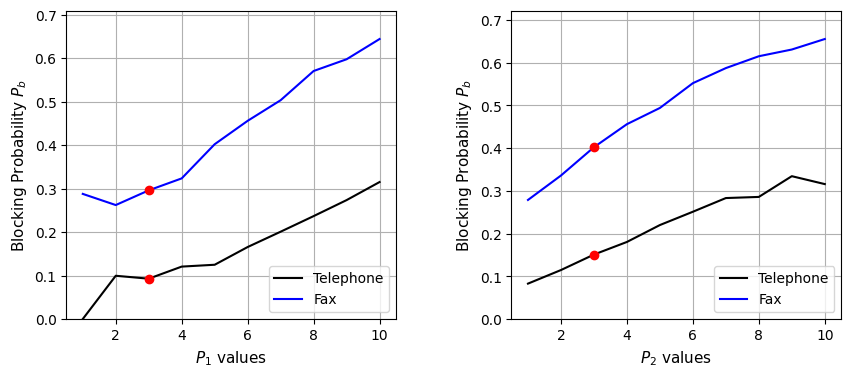

In [37]:

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.35, hspace=0.7)

populacao_arange = np.arange(1, 11, 1)
labels = ['Telephone', 'Fax']
colors = ['k', 'b']
print()

probabBloqueio = [[], []]
for populacao1 in populacao_arange:
  _, bloqueioClasse = MMNN_system(Classe1=(populacao1, 5, 5))
  for i in range(2): probabBloqueio[i] = np.append(probabBloqueio[i], bloqueioClasse[i])

for i in range(2):
  axes[0].plot(populacao_arange, probabBloqueio[i], label=labels[i], color=colors[i])
  axes[0].plot(3, probabBloqueio[i][2], 'ro')

axes[0].set_ylabel('Blocking Probability $P_{b}$', fontsize=11), axes[0].set_ylim([0, max(probabBloqueio[1])*1.1])
axes[0].set_xlabel('$P_{1}$ values', fontsize=11), axes[0].set_xlim([0.5, 10.5])
axes[0].grid(True), axes[0].legend(loc='lower right');

probabBloqueio = [[], []]
for populacao2 in populacao_arange:
  _, bloqueioClasse = MMNN_system(Classe2=(populacao2, 10, 2))
  for i in range(2): probabBloqueio[i] = np.append(probabBloqueio[i], bloqueioClasse[i])

for i in range(2):
  axes[1].plot(populacao_arange, probabBloqueio[i], label=labels[i], color=colors[i])
  axes[1].plot(3, probabBloqueio[i][2], 'ro')

axes[1].set_ylabel('Blocking Probability $P_{b}$', fontsize=11), axes[1].set_ylim([0, max(probabBloqueio[1])*1.1])
axes[1].set_xlabel('$P_{2}$ values', fontsize=11), axes[1].set_xlim([0.5, 10.5])
axes[1].grid(True), axes[1].legend(loc='lower right');


#### **Taxa de Chegada de Elementos - $\lambda_{1}$ e $\lambda_{2}$**
Os gráficos a seguir mostram a probabilidade de bloqueio para cada classe em função da variação das taxas de chegadas $\lambda_{1}$ e $\lambda_{2}$.

A medida que a taxa de chegadas dos elementos aumenta, o sistema tende a estar mais ocupado, gerando maiores taxas de bloqueio.

Os pontos marcados ilustram a operação do Sistema de Filas na condição $N=3$.

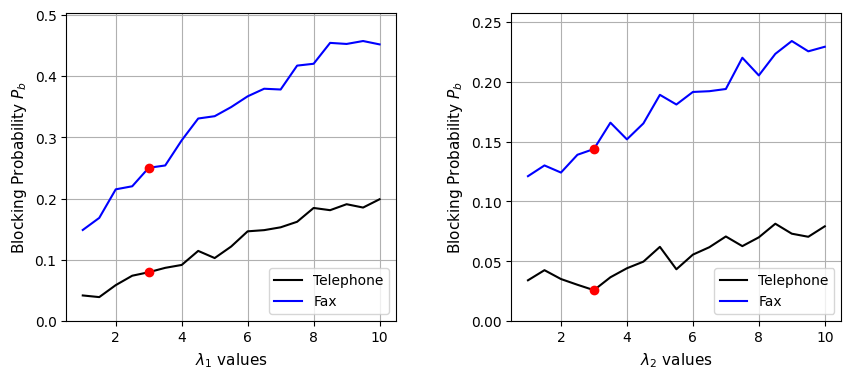

In [38]:

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.35, hspace=0.7)

lambda_arange = np.arange(1, 10.5, 0.5)
labels = ['Telephone', 'Fax']
colors = ['k', 'b']
print()

probabBloqueio = [[], []]
for lambda1 in lambda_arange:
  _, bloqueioClasse = MMNN_system(Classe1=(4, lambda1, 5))
  for i in range(2): probabBloqueio[i] = np.append(probabBloqueio[i], bloqueioClasse[i])

for i in range(2):
  axes[0].plot(lambda_arange, probabBloqueio[i], label=labels[i], color=colors[i])
  axes[0].plot(3, probabBloqueio[i][4], 'ro')

axes[0].set_ylabel('Blocking Probability $P_{b}$', fontsize=11), axes[0].set_ylim([0, max(probabBloqueio[1])*1.1])
axes[0].set_xlabel('$\lambda_{1}$ values', fontsize=11), axes[0].set_xlim([0.5, 10.5])
axes[0].grid(True), axes[0].legend(loc='lower right');

probabBloqueio = [[], []]
for lambda2 in lambda_arange:
  _, bloqueioClasse = MMNN_system(Classe1=(2, lambda2, 2))
  for i in range(2): probabBloqueio[i] = np.append(probabBloqueio[i], bloqueioClasse[i])

for i in range(2):
  axes[1].plot(lambda_arange, probabBloqueio[i], label=labels[i], color=colors[i])
  axes[1].plot(3, probabBloqueio[i][4], 'ro')

axes[1].set_ylabel('Blocking Probability $P_{b}$', fontsize=11), axes[1].set_ylim([0, max(probabBloqueio[1])*1.1])
axes[1].set_xlabel('$\lambda_{2}$ values', fontsize=11), axes[1].set_xlim([0.5, 10.5])
axes[1].grid(True), axes[1].legend(loc='lower right');


#### **Tempo Médio de Atendimento - $T_{s_{1}}$ e $T_{s_{2}}$:**
Os gráficos a seguir mostram a variação da probabilidade de bloqueio em função do tempos médios de atendimento $T_{s_{1}}$ e $T_{s_{2}}$.

A medida que os tempos médios de atendimento aumentam, os elementos de cada classe utilizam o sistema por mais tempo, resultando em maiores probabilidades de bloqueio.

Os pontos marcados ilustram a operação do Sistema de Filas na condição $N=3$.


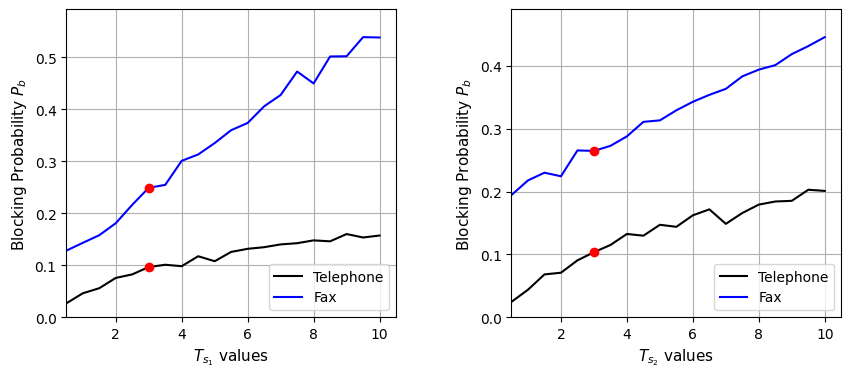

In [39]:

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.35, hspace=0.7)

Ets_arange = np.arange(0.5, 10.5, 0.5)
labels = ['Telephone', 'Fax']
colors = ['k', 'b']
print()

probabBloqueio = [[], []]
for Ets1 in Ets_arange:
  _, bloqueioClasse = MMNN_system(Classe1=(4, 5, Ets1))
  for i in range(2): probabBloqueio[i] = np.append(probabBloqueio[i], bloqueioClasse[i])

for i in range(2):
  axes[0].plot(Ets_arange, probabBloqueio[i], label=labels[i], color=colors[i])
  axes[0].plot(3, probabBloqueio[i][5], 'ro')

axes[0].set_ylabel('Blocking Probability $P_{b}$', fontsize=11), axes[0].set_ylim([0, max(probabBloqueio[1])*1.1])
axes[0].set_xlabel('$T_{s_{1}}$ values', fontsize=11), axes[0].set_xlim([0.5, 10.5])
axes[0].grid(True), axes[0].legend(loc='lower right');

probabBloqueio = [[], []]
for Ets2 in Ets_arange:
  _, bloqueioClasse = MMNN_system(Classe1=(2, 10, Ets2))
  for i in range(2): probabBloqueio[i] = np.append(probabBloqueio[i], bloqueioClasse[i])

for i in range(2):
  axes[1].plot(Ets_arange, probabBloqueio[i], label=labels[i], color=colors[i])
  axes[1].plot(3, probabBloqueio[i][5], 'ro')

axes[1].set_ylabel('Blocking Probability $P_{b}$', fontsize=11), axes[1].set_ylim([0, max(probabBloqueio[1])*1.1])
axes[1].set_xlabel('$T_{s_{2}}$ values', fontsize=11), axes[1].set_xlim([0.5, 10.5])
axes[1].grid(True), axes[1].legend(loc='lower right');


#### **Número de Servidores - $N$:**
O gráfico a seguir mostra a variação da probabilidade de bloqueio em função do número de servidores N.

À medida que N aumenta o sistema pode acomodar mais elementos em atendimento, resultando em menores probabilidades de bloqueio. Para a população do estudo de caso, $N_{min}=2$ para atender à classe 2, enquanto $N_{max}=8$ atende toda a população. Quando $N=8\rightarrow P_{b_{1}}=P_{b_{2}}=0$.

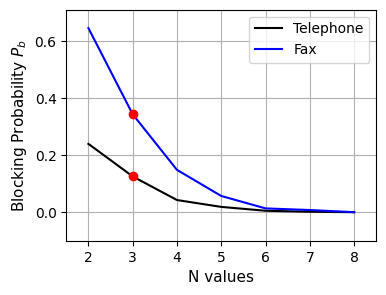

In [40]:

servidor_arange = np.arange(2, 9, 1)
labels = ['Telephone', 'Fax']
colors = ['k', 'b']
print()

probabBloqueio = [[], []]
for N in servidor_arange:
  _, bloqueioClasse = MMNN_system(N=N)
  for i in range(2): probabBloqueio[i] = np.append(probabBloqueio[i], bloqueioClasse[i])

plt.figure(figsize=(4, 3))
for i in range(2):
  plt.plot(servidor_arange, probabBloqueio[i], label=labels[i], color=colors[i])
  plt.plot(3, probabBloqueio[i][1], 'ro')

plt.ylabel('Blocking Probability $P_{b}$', fontsize=11), plt.ylim([-0.1, max(probabBloqueio[1])*1.1])
plt.xlabel('N values', fontsize=11), plt.xlim([1.5, 8.5])
plt.grid(True), plt.legend(loc='upper right');
